# Threshold scan data analysis

### This script analyzes the recorded serial output from the daq card.


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect_left
import itertools
import time
import datetime
import os

In [2]:
# variables for configuration

#data_file = "20171110-1558_Thresh_scan_start-5_stop-200_step-5_sec_per_rec_120_detector_mode_2E_low_light_low_noise.txt"
data_file = "20171115-1444_Thresh_scan_start-10_stop-600_step-10_sec_per_rec_120_detector_mode_2E.txt"


In [3]:
# Functions
def simplecount(filename):
    lines = 0
    for line in open(filename, 'U'):
        lines += 1
    return lines

In [4]:
print("Counting lines")
lines_to_read = simplecount(data_file)
print("Lines to read: "+ str(lines_to_read))

print("Starting to parse the file")
line_count = 0
recording_secs_per_setting = 0
current_threshold = 0

threshold_list = []
count_lists = []

for current_line in open(data_file, 'U'):
    line_count += 1
    if (line_count % (lines_to_read//20)) == 0:
        print("Percentage of file read: " + str(round( float(line_count)*100 / float(lines_to_read), 2)))
    
    if "recording_secs_per_setting:" in current_line:
        split_line = current_line.replace("\n","").split(":")
        recording_secs_per_setting = float(split_line[len(split_line)-1])
        continue
    
    if "Current Threshold:" in current_line:
        split_line = current_line.replace("\n","").split(":")
        current_threshold = int(split_line[len(split_line)-1])
        continue
    
    if "DS S0" in current_line:
        split_line = current_line.split(" ")
        data = [int(split_line[i+1].split("=")[1].replace("\n",""),16)/recording_secs_per_setting for i in range(5)]
        threshold_list.append(current_threshold)
        count_lists.append(data)

count_lists = np.asarray(count_lists)
threshold_list = np.asarray(threshold_list, dtype=np.float64)
# calculate out the pre-amplification
threshold_list /= 10.

Counting lines
Lines to read: 422
Starting to parse the file
Percentage of file read: 4.98
Percentage of file read: 9.95
Percentage of file read: 14.93
Percentage of file read: 19.91
Percentage of file read: 24.88
Percentage of file read: 29.86
Percentage of file read: 34.83
Percentage of file read: 39.81
Percentage of file read: 44.79
Percentage of file read: 49.76
Percentage of file read: 54.74
Percentage of file read: 59.72
Percentage of file read: 64.69
Percentage of file read: 69.67
Percentage of file read: 74.64
Percentage of file read: 79.62
Percentage of file read: 84.6
Percentage of file read: 89.57
Percentage of file read: 94.55
Percentage of file read: 99.53


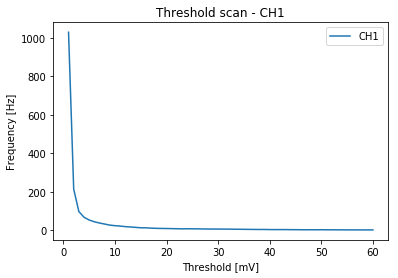

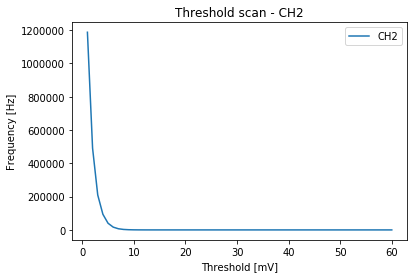

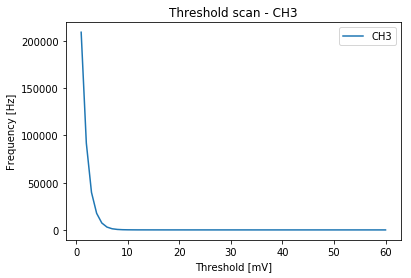

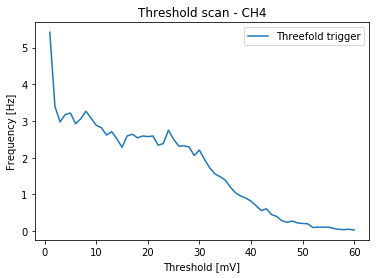

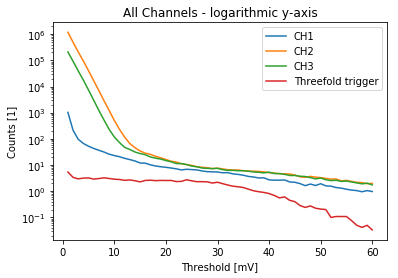

In [5]:
# create folder for the plot dump
directory = "plot_save/"+data_file.split('.')[0]+"/"
if not os.path.exists(directory):
    os.makedirs(directory)

# create plots
for i in range(len(count_lists[0])):
    if count_lists[:,i].any() == 0:
        continue
    if i == 4:
        plt.plot(threshold_list, count_lists[:,i], label="Threefold trigger")
    else:
        plt.plot(threshold_list, count_lists[:,i], label="CH"+str(i))
    plt.legend()
    title = "Threshold scan - CH"+str(i)
    plt.title(title)
    plt.xlabel("Threshold [mV]")
    plt.ylabel("Frequency [Hz]")
    plt.savefig(directory+title+".pdf")
    plt.show()

for i in range(len(count_lists[0])):
    if count_lists[:,i].any() == 0:
        continue
    if i == 4:
        plt.semilogy(threshold_list, count_lists[:,i], label="Threefold trigger")
    else:
        plt.semilogy(threshold_list, count_lists[:,i], label="CH"+str(i))
plt.legend()
title = "All Channels - logarithmic y-axis"
plt.title(title)
plt.xlabel("Threshold [mV]")
plt.ylabel("Counts [1]")
plt.savefig(directory+title+".pdf", dpi=600)
plt.show()